## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [99]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [147]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [148]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'
data = data.split(split_tag)
print(len(data))
data[1]

9996


'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'

In [58]:
a,b = data[10].split('\t',1)
print(a)
print(b)

n00015388_514
http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg


## 將 txt 轉成 pandas dataframe

In [160]:
import pandas as pd
website = []
no = []
for line in data:
    line = line.strip()
    if line:
        a,b = line.split('\t',1)
        website.append(b)
        no.append(a)
arrange_data = {"Source":website,"Nunber":no}
df = pd.DataFrame(arrange_data)
df.head()

Nunber                                             Source
0  n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1  n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2  n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3  n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4  n00015388_355  http://img100.imageshack.us/img100/3253/forres...

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


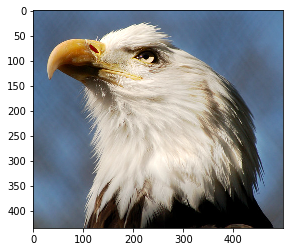

In [168]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,"Source"]

print(first_link)

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [161]:
def img2arr_fromURLs(url_list, resize = False):
    raw_list = url_list.tolist()
    img_list=[]
    n = 0
    for raw in raw_list:
        n += 1
        try:
            response = requests.get(raw)
            img = Image.open(BytesIO(response.content))
        except:
            print("第",n,"張照片連結失效")
            img = ""
        img_list.append(img)
    return img_list

第 5 張照片連結失效
第 6 張照片連結失效
第 7 張照片連結失效
第 8 張照片連結失效
第 9 張照片連結失效
第 14 張照片連結失效
第 15 張照片連結失效
第 16 張照片連結失效
第 22 張照片連結失效
第 23 張照片連結失效
第 24 張照片連結失效
第 28 張照片連結失效
第 30 張照片連結失效
第 31 張照片連結失效
第 33 張照片連結失效
第 38 張照片連結失效
第 41 張照片連結失效
第 42 張照片連結失效
第 43 張照片連結失效
第 46 張照片連結失效
第 48 張照片連結失效
第 49 張照片連結失效
第 50 張照片連結失效
Total images that we got: 50 


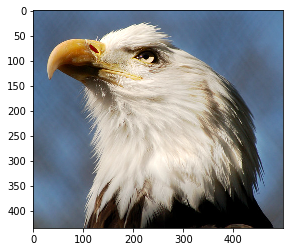

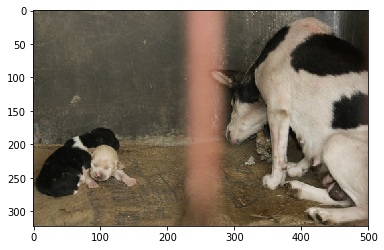

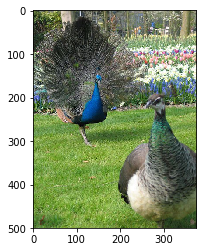

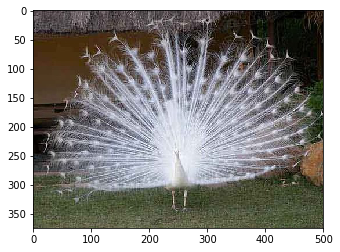

圖片無法顯示
圖片無法顯示
圖片無法顯示
圖片無法顯示
圖片無法顯示


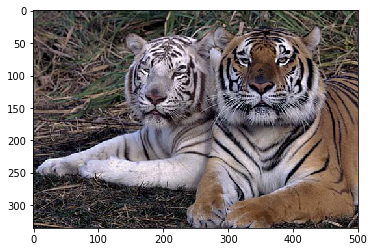

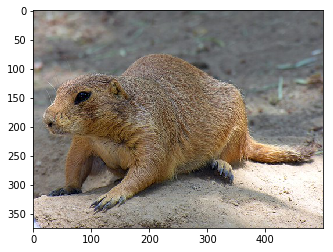

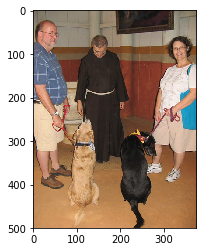

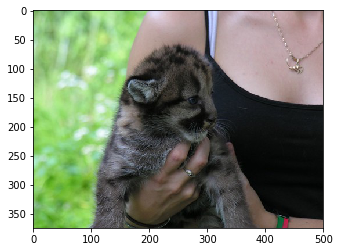

圖片無法顯示
圖片無法顯示
圖片無法顯示


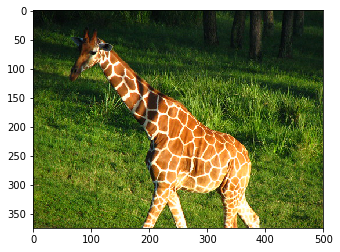

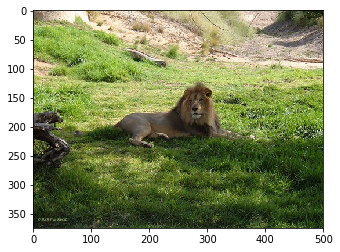

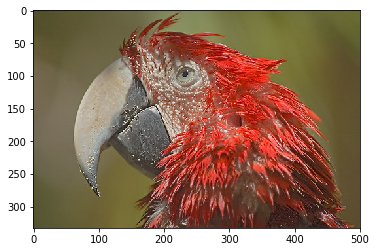

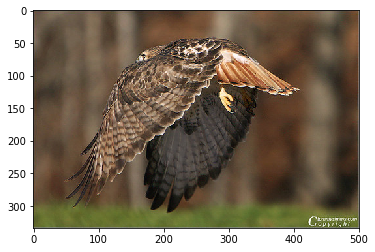

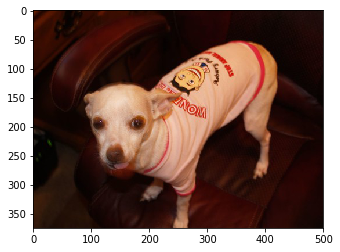

圖片無法顯示
圖片無法顯示
圖片無法顯示


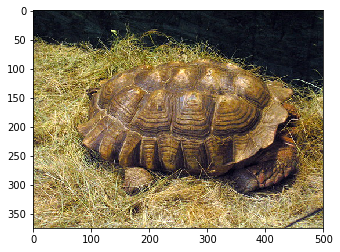

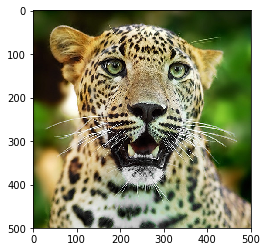

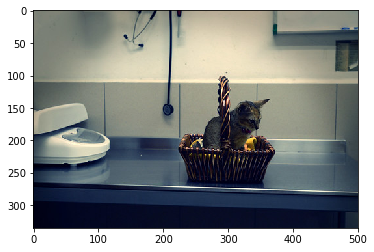

圖片無法顯示


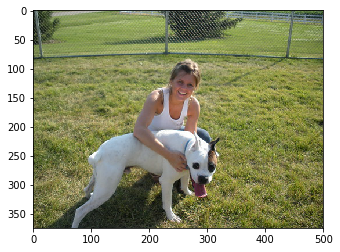

圖片無法顯示
圖片無法顯示


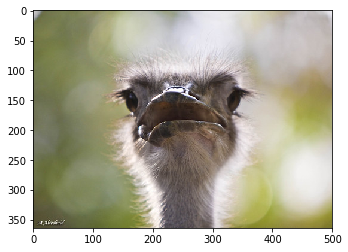

圖片無法顯示


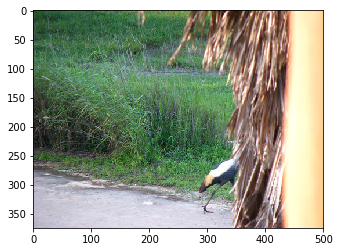

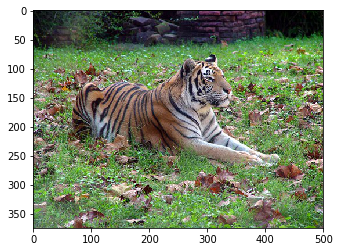

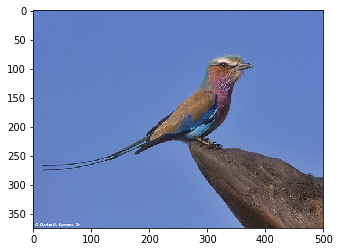

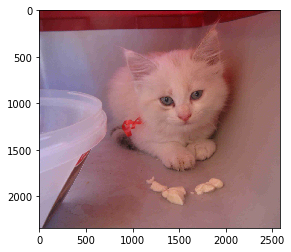

圖片無法顯示


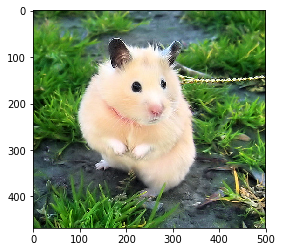

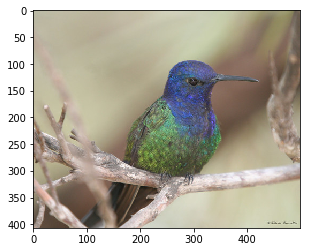

圖片無法顯示
圖片無法顯示
圖片無法顯示


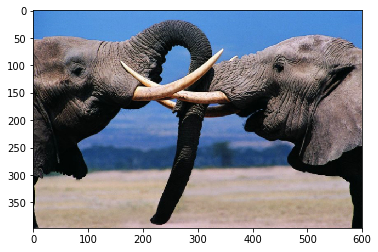

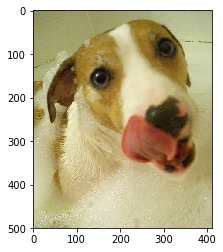

圖片無法顯示


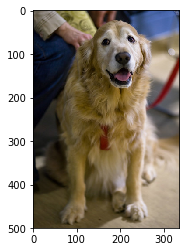

圖片無法顯示
圖片無法顯示
圖片無法顯示


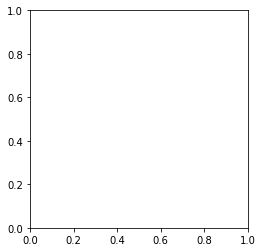

In [166]:
result = img2arr_fromURLs(df[0:50]["Source"].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉


for im_get in result:
    try:
        plt.imshow(im_get)
        plt.show()
    except:
        print("圖片無法顯示")